In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)
sns.set(style="whitegrid")

In [21]:
installs = pd.read_csv('C:/Users/emcruz/datos/tp-2019-organizacion-de-datos/installs.csv.gzip',compression='gzip',low_memory=False,parse_dates=[0])

In [30]:
installs['created_truncated_to_minute'] = installs['created'].dt.floor('T')
installs['created_rounded_to_minute'] = installs['created'].dt.round('T')
installs['fecha'] = installs['created'].dt.floor('D')
installs['hora'] = installs['created'].dt.hour
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,...,event_uuid,kind,wifi,trans_id,ip_address,device_language,created_truncated_to_minute,fecha,hora,created_rounded_to_minute
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,...,NaN,NaN,NaN,NaN,5529284367937637301,NaN,2019-03-13 01:43:00,2019-03-13,1,2019-03-13 01:44:00
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,...,NaN,NaN,NaN,NaN,6098022721363533304,NaN,2019-03-13 04:58:00,2019-03-13,4,2019-03-13 04:59:00
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,...,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,2019-03-13 04:20:00,2019-03-13,4,2019-03-13 04:21:00
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,...,NaN,NaN,NaN,NaN,4636407223847323867,NaN,2019-03-13 04:20:00,2019-03-13,4,2019-03-13 04:21:00
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,...,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,2019-03-10 22:24:00,2019-03-10,22,2019-03-10 22:25:00


In [69]:
grouped=installs.groupby(['application_id'])

In [11]:
def graficoPorHoras(instalaciones,title='Instalaciones por hora'):
    grafico=instalaciones.groupby('hora')['fecha'].count().plot(figsize=(16,8),fontsize=14,kind='bar')
    grafico.set_title(title)
    grafico.set_xlabel('hora',fontsize=14)
    grafico.set_ylabel('Cantidad de instalaciones',fontsize=14)

In [15]:
fechaMayorSubastas=pd.Timestamp('2019-03-13')
fecha_con_mas_instalaciones = installs[(installs['fecha']==fechaMayorSubastas)]

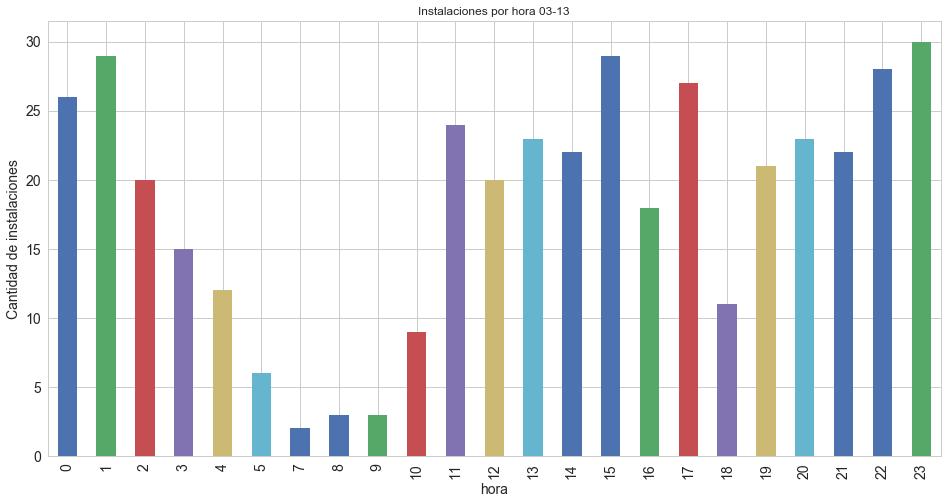

In [16]:
graficoPorHoras(fecha_con_mas_instalaciones,'Instalaciones por hora 03-13') 

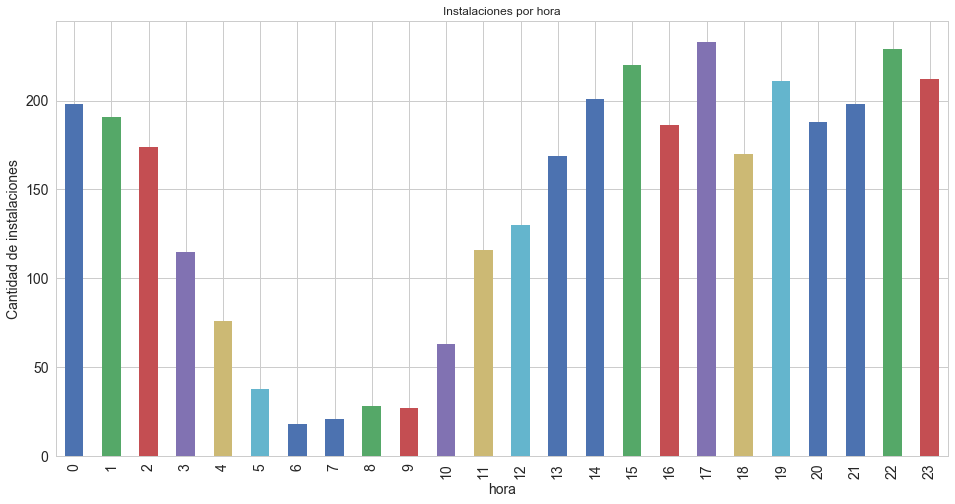

In [12]:
graficoPorHoras(installs)

In [31]:
duplicados_truncados=installs[['created_truncated_to_minute','ref_hash','created']].groupby(['created_truncated_to_minute','ref_hash']).count().sort_values(by='created_truncated_to_minute')
duplicados_redondeados=installs[['created_rounded_to_minute','ref_hash','created']].groupby(['created_rounded_to_minute','ref_hash']).count().sort_values(by='created_rounded_to_minute')

In [50]:
duplicados_1=duplicados_redondeados[duplicados_redondeados['created']>1].reset_index().rename(columns={"created_rounded_to_minute":"fecha_hora"})
duplicados_2=duplicados_truncados[duplicados_truncados['created']>1].reset_index().rename(columns={"created_truncated_to_minute":"fecha_hora"})

In [60]:
pd.concat([duplicados_1,duplicados_2]).groupby(['fecha_hora','ref_hash']).count().size

430